In [13]:
!wget -P data --progress=bar:force http://wwwuser.gwdg.de/~compbiol/data/hhsuite/databases/hhsuite_dbs/scop40_01Mar17.tgz
!tar zxf data/scop40_01Mar17.tgz
!rm data/scop40_01Mar17.tgz
!ls -lh data/scop40_*.ff*

-rw------- 1 makigaki ishidalab 853M  3月  1  2017 data/scop40_a3m.ffdata
-rw------- 1 makigaki ishidalab  68K  3月  1  2017 data/scop40_a3m.ffindex
-rw------- 1 makigaki ishidalab 390K  3月  1  2017 data/scop40_cs219.ffdata
-rw------- 1 makigaki ishidalab  51K  3月  1  2017 data/scop40_cs219.ffindex
-rw------- 1 makigaki ishidalab  62M  3月  1  2017 data/scop40_hhm.ffdata
-rw------- 1 makigaki ishidalab  63K  3月  1  2017 data/scop40_hhm.ffindex


In [14]:
from pathlib import Path
from io import StringIO

from Bio import SeqIO


ffindex = [(int(_.split()[1]), int(_.split()[2])) for _ in Path('data/scop40_a3m.ffindex').read_text().splitlines()]
hh_scop40 = []
with Path('data/scop40_a3m.ffdata').open() as f:
    for pos in ffindex:
        f.seek(pos[0])
        record = next(SeqIO.parse(StringIO(f.read(pos[1])), 'fasta'))
        record.seq = record.seq.ungap('-')
        hh_scop40.append(record)
with Path('data/hh_scop40.fasta').open('w') as f:
    SeqIO.write(hh_scop40, f, 'fasta')

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

from Bio.Blast.Applications import NcbimakeblastdbCommandline

from agora import AgoraDatabase

Path('data/blastdb').mkdir(exist_ok=True)
#NcbimakeblastdbCommandline(dbtype='prot', input_file=Path('data/hh_scop40.fasta').as_posix(), out='data/blastdb/hh_scop40')()
#AgoraDatabase('data/blastdb/hh_scop40').make_database(Path('data/hh_scop40.fasta'), Path()/'data'/'hh_scop40.graphml'))
AgoraDatabase('data/blastdb/hh_scop40').import_graphml(Path()/'data'/'hh_scop40.graphml', None)

In [8]:
from IPython.display import display
import networkx

G = networkx.read_graphml('data/hh_scop40.graphml')
G_random = networkx.generators.random_graphs.watts_strogatz_graph(len(G.nodes), 20, 0.01)
display(networkx.average_shortest_path_length(G_random))
G_random = networkx.generators.random_graphs.watts_strogatz_graph(len(G.nodes), 20, 0.1)
display(networkx.average_shortest_path_length(G_random))
display(networkx.average_shortest_path_length(G))
#display(networkx.average_clustering(G))

6.262369925289152

3.7253392229476825

3.4171164438230934

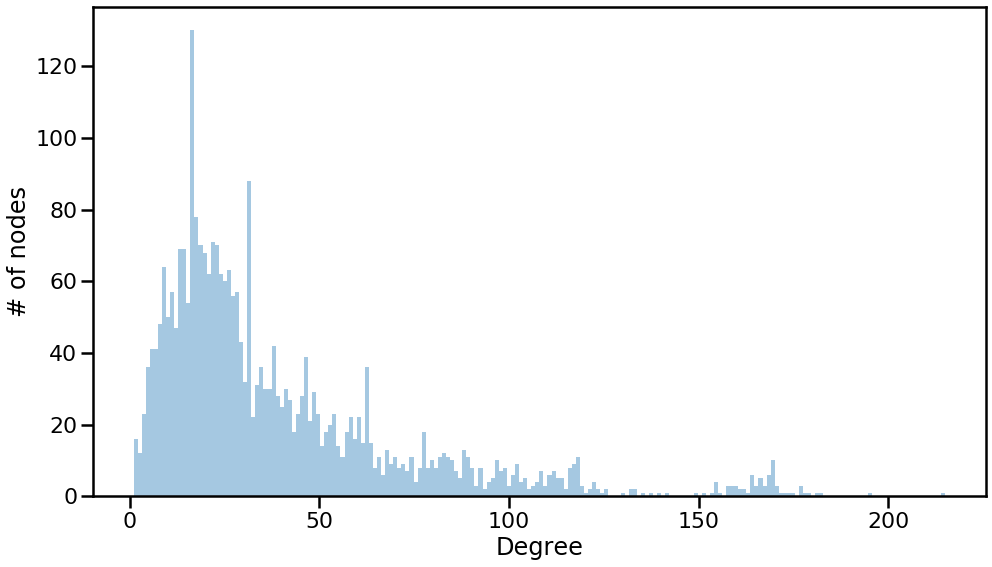

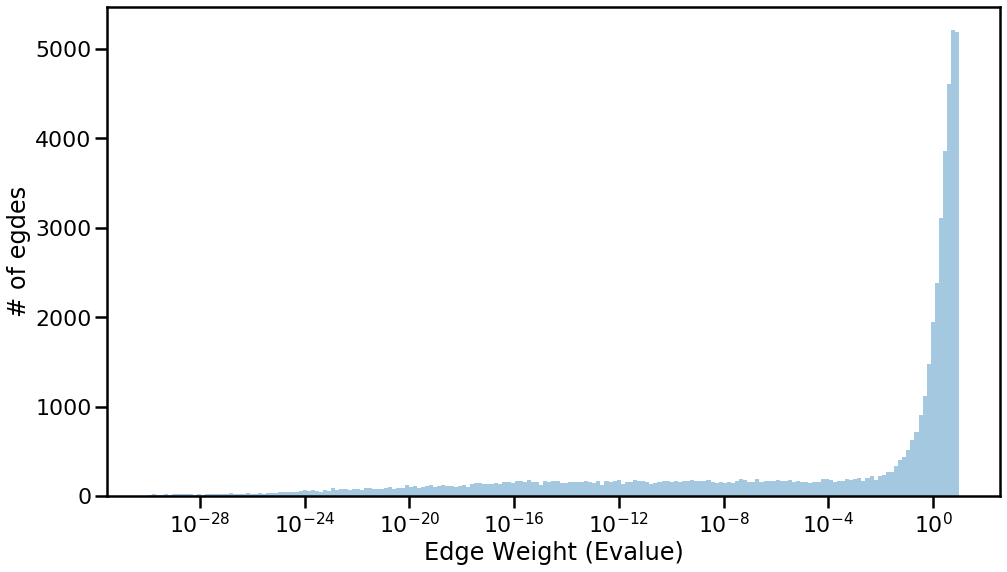

In [5]:
%matplotlib inline

from IPython.display import display
import networkx
from matplotlib import pyplot
import seaborn
import numpy as np

seaborn.set_context('poster')

G = networkx.read_graphml('data/hh_scop40.graphml')
x = [_[1] for _ in G.degree()]
fig, ax = pyplot.subplots(figsize=(16, 9))
seaborn.distplot(x, kde=False, ax=ax, bins=200)
ax.set_xlabel('Degree')
ax.set_ylabel('# of nodes')
fig.savefig('degree.pdf', bbox_inches='tight', pad_inches=0)

x = [_[2] for _ in G.edges(data='weight')]
fig, ax = pyplot.subplots(figsize=(16, 9))
seaborn.distplot(x, kde=False, ax=ax, bins=np.logspace(-30, 1, 200))
ax.set_xscale('log')
ax.set_xlabel('Edge Weight (Evalue)')
ax.set_ylabel('# of egdes')
fig.savefig('weight.pdf', bbox_inches='tight', pad_inches=0)

In [1]:
# Uniref90: 2019-06-30
!wget -P data-large --progress=bar:force ftp://ftp.uniprot.org/pub/databases/uniprot/uniref/uniref90/uniref90.fasta.gz
!gunzip data-large/uniref90.fasta.gz
!ls -lh data-large/uniref90*

-rw-r--r-- 1 makigaki ishidalab 42G  7月  3 22:11 data-large/uniref90.fasta


In [ ]:
from pathlib import Path

from Bio.Blast.Applications import NcbimakeblastdbCommandline

Path('data-large/blastdb').mkdir(exist_ok=True)
NcbimakeblastdbCommandline(dbtype='prot', input_file=Path('data-large/uniref90.fasta').as_posix(), out='data-large/blastdb/uniref90')()

In [16]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import random

from Bio import SeqIO
from tqdm import tqdm

from agora import AgoraDatabase

# 12min...
seq_index = SeqIO.index('data-large/uniref90.fasta', 'fasta')

seq_id_list = [_.id.split('_')[1] for _ in seq_index]
random.shffle(seq_id_list)
for seq_id in tqdm(seq_id_list):
    p = Path(f'data-large/uniref90/{seq_id[2:4]}/{seq_id}.graphml')
    if p.exists():
        continue
    AgoraDatabase('data-large/blastdb/uniref90', 'data/blastdb/cdd_delta', None).make_database_by_node(index[seq_id], p)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU times: user 11min 5s, sys: 1min 33s, total: 12min 38s
Wall time: 12min 40s


96885781